## Loading the Dataset

In [1]:
from data import STEAD
stead = STEAD('/home/srivastava-shared/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


## Getting Data and Labels in the format for CREIME

In [2]:
X, y = stead.get_creime_data(stead.trace_list()[-20:])

 95%|█████████▌| 19/20 [00:01<00:00,  9.60it/s]

In [3]:
X

array([[[ 3.91618276e+00, -1.32270365e+01,  4.59516811e+00],
        [ 9.15897655e+00, -5.73762369e+00,  4.55509138e+00],
        [-3.67638421e+00, -4.30334997e+00,  3.92401338e+00],
        ...,
        [ 7.34664688e+01,  7.15650864e+01,  2.82302979e+02],
        [ 5.94214439e+01, -1.66717148e+02,  3.16323792e+02],
        [-2.44879189e+01, -1.64383682e+02,  1.45742477e+02]],

       [[-4.64310265e+00, -1.27117434e+01,  4.77431583e+00],
        [ 2.06111393e+01, -2.13638382e+01,  2.68502688e+00],
        [-9.11396790e+00,  7.08315802e+00,  5.60216951e+00],
        ...,
        [-2.13013458e+02,  5.56955719e+01,  3.06534088e+02],
        [-8.72659454e+01, -1.00164993e+02, -1.69842587e+01],
        [ 1.89495041e+02, -5.64077911e+01, -7.58703232e+01]],

       [[-1.08132429e+01, -7.79858541e+00, -5.04011917e+01],
        [-2.18026257e+01,  4.73602829e+01,  1.84032955e+01],
        [ 4.02919960e+00, -1.51033344e+01,  2.09244843e+01],
        ...,
        [-5.99232483e+01, -5.65814819e+01,

In [4]:
y

array([[-4.  , -4.  , -4.  , ...,  4.  ,  4.  ,  4.  ],
       [-4.  , -4.  , -4.  , ...,  3.08,  3.08,  3.08],
       [-4.  , -4.  , -4.  , ...,  1.96,  1.96,  1.96],
       ...,
       [-4.  , -4.  , -4.  , ...,  6.44,  6.44,  6.44],
       [-4.  , -4.  , -4.  , ...,  5.  ,  5.  ,  5.  ],
       [-4.  , -4.  , -4.  , ...,  3.28,  3.28,  3.28]])

In [5]:
from visualizations import plot_creime_data

100%|██████████| 20/20 [00:02<00:00,  8.66it/s]


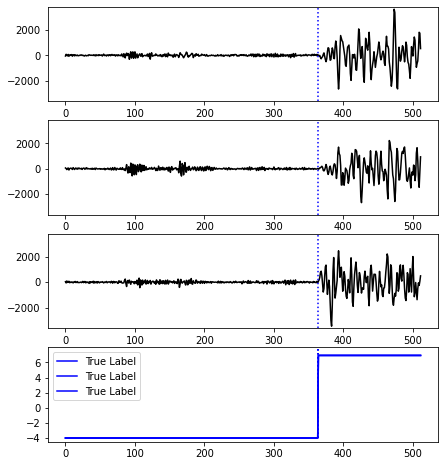

In [6]:
plot_creime_data(X[6], y[6])

## Loading CREIME

In [7]:
from models import CREIME
creime = CREIME()
print(creime)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 512, 3)]          0         
                                                                 
 conv1d_51 (Conv1D)          (None, 512, 32)           1568      
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 128, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 128, 16)           8208      
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 32, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 32, 8)             205

In [8]:
y_pred, predictions = creime.predict(X)

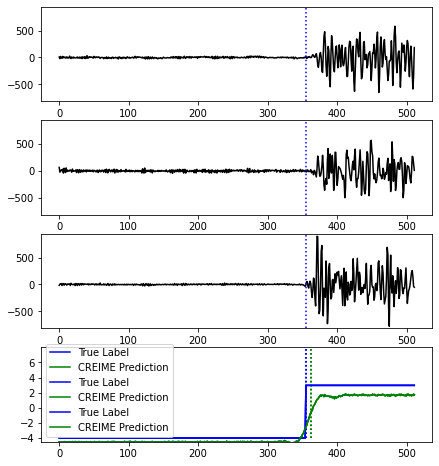

In [9]:
plot_creime_data(X[3], y[3], y_pred[3])

In [10]:
predictions

[(1, 1.3762401, 335),
 (1, 1.643611, 407),
 (1, 1.6992319, 339),
 (1, 1.6900094, 363),
 (1, 1.6547782, 408),
 (1, 2.2211766, 343),
 (1, 2.611318, 368),
 (1, 1.3929424, 397),
 (1, 2.1269226, 341),
 (1, 1.653758, 360),
 (1, 1.7284555, 407),
 (1, 1.4133834, 352),
 (1, 1.1897371, 369),
 (1, 2.0634928, 386),
 (1, 1.8244861, 324),
 (1, 1.5290086, 386),
 (1, 1.3076735, 347)]

Alternatively

In [11]:
model = creime.get_model()

In [12]:
y_pred = model.predict(X)

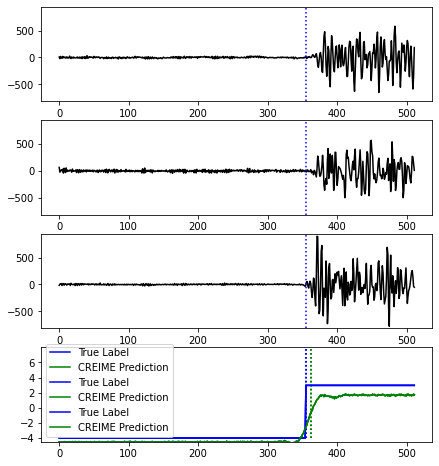

In [13]:
plot_creime_data(X[3], y[3], y_pred[3])